In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Here also we can see that there are very much amount of columns are present hence we will perform PCA.

# PCA

In [5]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
df1=df.drop(['size_category','month','day'],axis=1)
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2=df1.values
df2

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [8]:
df_norm=norm_func(df2)
df_norm

array([[0.07902167, 0.02401819, 0.08644714, ..., 0.        , 0.        ,
        0.        ],
       [0.08305526, 0.03245206, 0.61338051, ..., 0.        , 0.00091672,
        0.        ],
       [0.08305526, 0.04006087, 0.62969821, ..., 0.        , 0.00091672,
        0.        ],
       ...,
       [0.07480474, 0.05197829, 0.61017198, ..., 0.        , 0.        ,
        0.        ],
       [0.08653881, 0.13384181, 0.56351069, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

In [10]:
pca=PCA(n_components=28)
pca_values=pca.fit_transform(df_norm)

In [11]:
pca_values

array([[ 4.23295701e-01, -6.18393222e-03, -1.08232914e-03, ...,
        -1.56027533e-06, -4.71243421e-17, -5.59417546e-17],
       [-9.66722225e-02, -1.97904613e-02, -8.72180934e-02, ...,
        -2.74769374e-05,  8.86994749e-17, -5.82543581e-17],
       [-1.14050511e-01, -1.96990641e-02, -8.27304181e-02, ...,
        -1.73179705e-05, -4.18381529e-17, -9.13591035e-17],
       ...,
       [-9.70318641e-02, -8.66629587e-03, -6.65660978e-02, ...,
         2.19167470e-05,  3.12276491e-18,  1.33926029e-17],
       [-6.59216137e-02, -1.09413020e-02,  2.16576835e-02, ...,
         3.41701800e-06, -1.10038391e-17,  2.20716798e-18],
       [ 4.15909880e-01, -7.74778450e-03, -2.51451422e-02, ...,
         8.28673250e-04, -5.11111500e-18,  1.27598885e-18]])

In [12]:
var=pca.explained_variance_ratio_
var

array([9.07093176e-01, 5.78803113e-02, 3.02921761e-02, 3.89483042e-03,
       4.29397705e-04, 2.09240390e-04, 1.41323146e-04, 3.94232459e-05,
       3.70786517e-06, 2.46118489e-06, 2.22244400e-06, 2.08057171e-06,
       1.84475426e-06, 1.67548854e-06, 1.50865000e-06, 1.16350198e-06,
       1.04310680e-06, 8.13087873e-07, 5.39877566e-07, 3.93614562e-07,
       2.96154791e-07, 1.71998865e-07, 8.65079445e-08, 4.91906496e-08,
       3.64939872e-08, 2.72643301e-08, 7.86379710e-33, 7.86379710e-33])

In [13]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([90.71, 96.5 , 99.53, 99.92, 99.96, 99.98, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99])

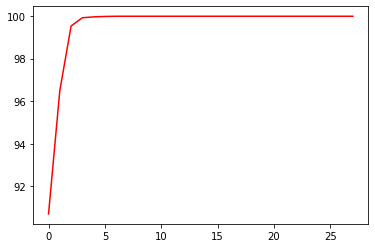

In [14]:
plt.plot(var1,color='red')

In [ ]:
#Hence from above we can see that we can get maximum of our information from 1st 3 pc's hence we will work on them

In [15]:
final=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), df[['size_category']]], axis = 1)

In [16]:
final

,pc1,pc2,pc3,size_category
0,0.423296,-0.006184,-0.001082,small
1,-0.096672,-0.019790,-0.087218,small
2,-0.114051,-0.019699,-0.082730,small
3,0.437314,-0.006019,0.010666,small
4,0.412064,-0.005438,0.022902,small
...,...,...,...,...
512,-0.097127,-0.012306,-0.068155,large
513,-0.097584,0.030727,-0.069555,large
514,-0.097032,-0.008666,-0.066566,large
515,-0.065922,-0.010941,0.021658,small


In [18]:
array=final.values
x=array[:,0:3]
y=array[:,3]

In [19]:
array

array([[0.4232957010128452, -0.00618393222049031, -0.0010823291434796762,
        'small'],
       [-0.09667222246343375, -0.01979046131892001, -0.08721809339436855,
        'small'],
       [-0.11405051058397223, -0.019699064055177316, -0.0827304181380302,
        'small'],
       ...,
       [-0.09703186407017649, -0.008666295872103434,
        -0.06656609780350935, 'large'],
       [-0.0659216136900468, -0.0109413020185633, 0.021657683511858143,
        'small'],
       [0.41590988030117015, -0.007747784495861128,
        -0.025145142162252103, 'small']], dtype=object)

# SVM

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 3), (361,), (156, 3), (156,))

In [22]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [23]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.9029279279279278)

In [24]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 91.02564102564102


array([[ 22,  13],
       [  1, 120]], dtype=int64)

In [ ]:
# Here the accuracy of our model is appx. 93%

# EDA with VIsualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [26]:
f = pd.read_csv('forestfires.csv')

In [27]:
f.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [28]:
f.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [29]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='FFMC'>

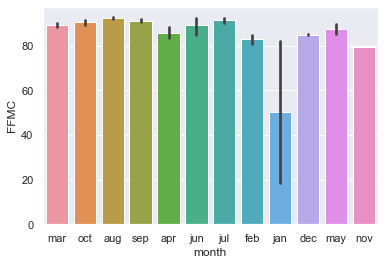

In [30]:
sns.barplot(f["month"],f["FFMC"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMC', ylabel='DC'>

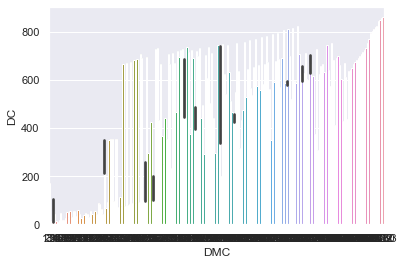

In [31]:
sns.barplot(f["DMC"],f["DC"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wind', ylabel='rain'>

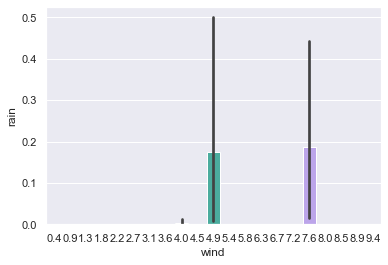

In [32]:
sns.barplot(f["wind"],f["rain"])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind', ylabel='Density'>

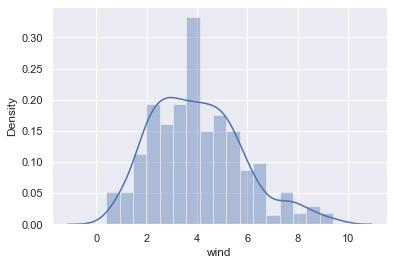

In [33]:
sns.distplot(f['wind'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RH', ylabel='Density'>

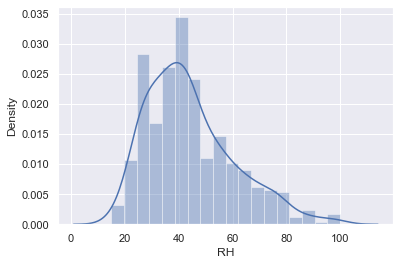

In [34]:
sns.distplot(f['RH'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


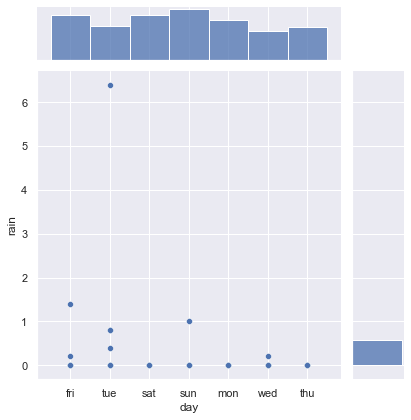

In [35]:
sns.jointplot(f['day'],f['rain'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


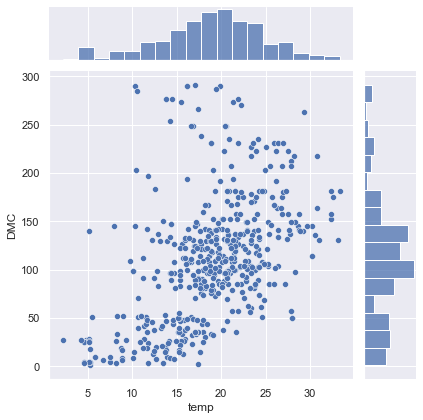

In [37]:
sns.jointplot(f['temp'],f['DMC'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


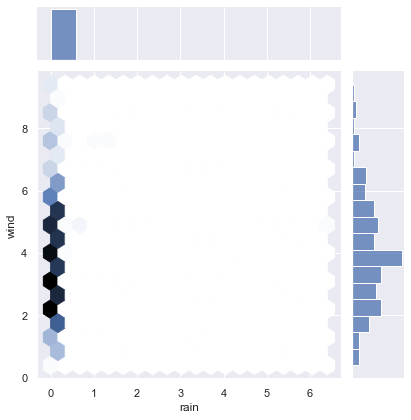

In [38]:
sns.jointplot(f['rain'],f['wind'], kind="hex")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


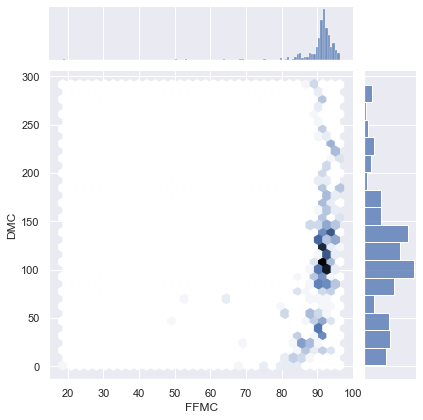

In [40]:
sns.jointplot(f['FFMC'],f['DMC'], kind="hex")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


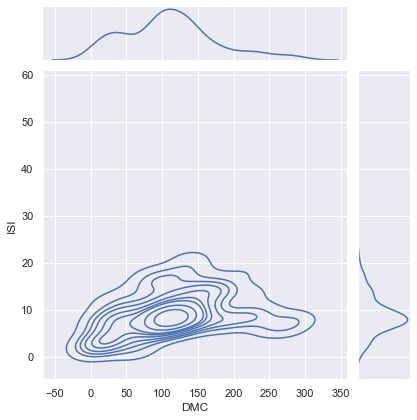

In [41]:
sns.jointplot(f['DMC'],f['ISI'], kind="kde")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


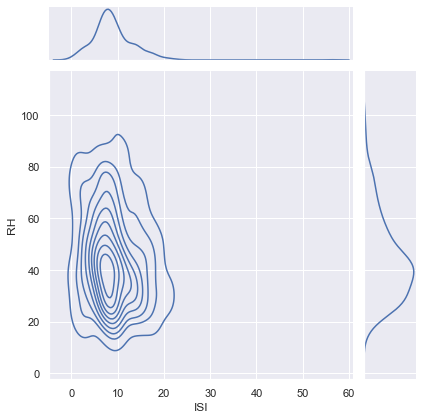

In [42]:
sns.jointplot(f['ISI'],f['RH'], kind="kde")

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RH', ylabel='DC'>

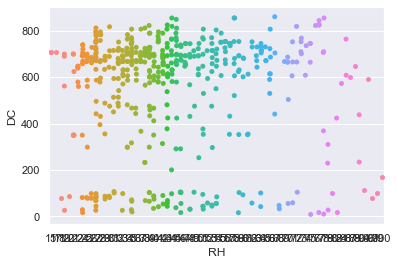

In [43]:
sns.stripplot(f['RH'],f['DC'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FFMC', ylabel='wind'>

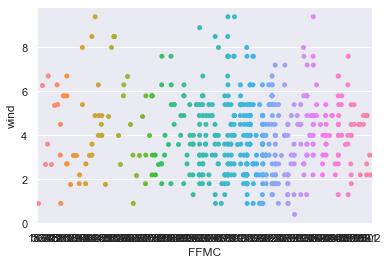

In [44]:
sns.stripplot(f['FFMC'],f['wind'], jitter = True)

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthjul', ylabel='monthjun'>

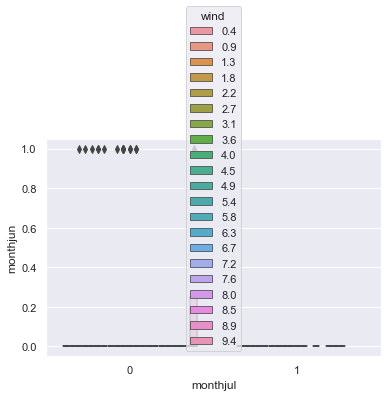

In [45]:
sns.boxplot(f['monthjul'],f['monthjun'], hue=f['wind'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RH', ylabel='count'>

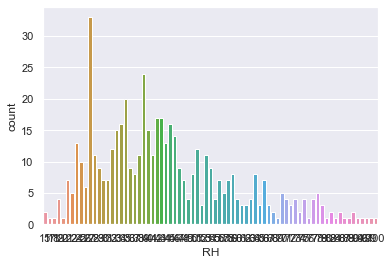

In [46]:
sns.countplot(f['RH'])

C:\Users\samrat\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ISI', ylabel='DMC'>

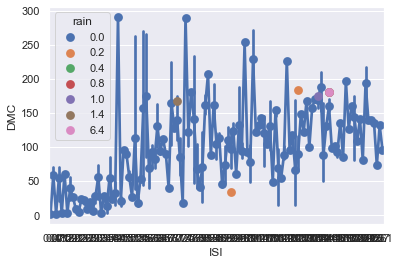

In [47]:
sns.pointplot(f['ISI'],f['DMC'], hue=f['rain'])

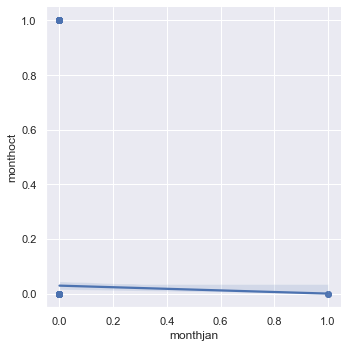

In [48]:
sns.lmplot(x='monthjan',y='monthoct', data=f )

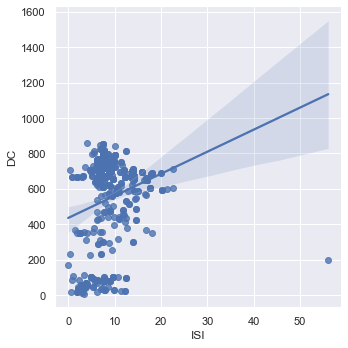

In [49]:
sns.lmplot(x='ISI',y='DC', data=f )